<a href="https://colab.research.google.com/github/jmrojash/SIIP-Project/blob/main/ODE_Flow/Phase_space_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This notebook is a modified version of [Visualization of ODE Flow](https://github.com/eggls6/ode_flow/blob/main/phase_space_flow.ipynb) written by [eggls6](https://github.com/eggls6).

# Visualization of ODE Flow

This notebook illustrates several ways to plot the flow in phase space for ordinary differential equations (ODEs).

### The phase portrait of the mathematical pendulum
The corresponding equation of motion is:
$\ddot{\theta} = -\sin{\theta}$

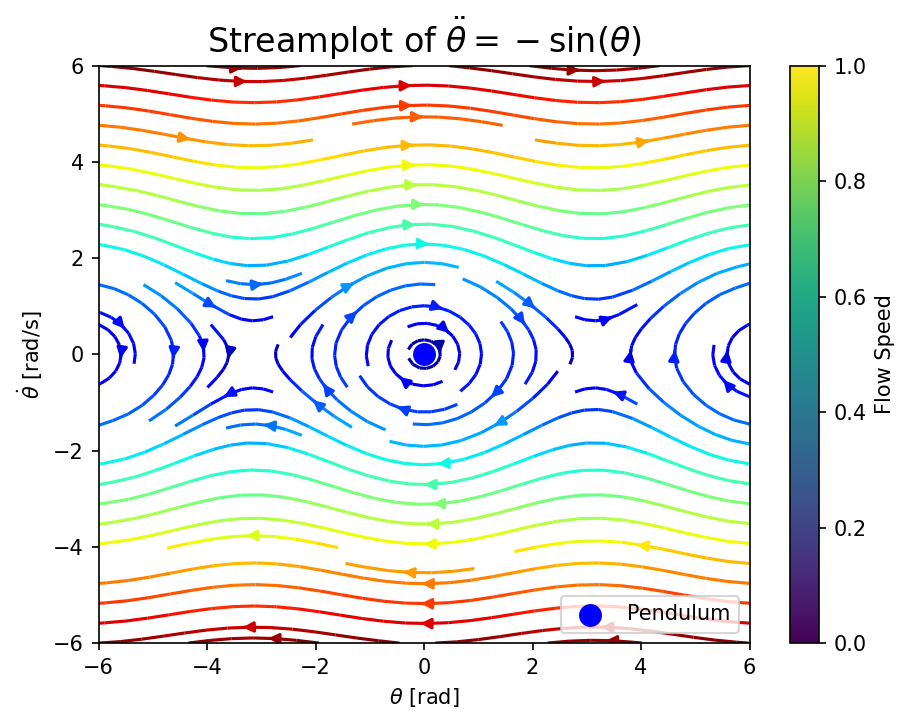

In [221]:
import numpy as np
import matplotlib.pyplot as plt

# Define plot range
w = 6

# Produce sampling grid
Y, X = np.mgrid[-w:w:100j, -w:w:100j]

# Define ordinary differential equation (ODE)
Xdot = Y
Ydot = -np.sin(X)

# ODE flow speed
speed = np.sqrt(Xdot**2 + Ydot**2)

# Create plot
cmap = plt.get_cmap("jet")
fig = plt.figure(figsize=(7, 5), dpi=150)
plt.streamplot(X, Y, Xdot, Ydot, density=1, color=speed, cmap=cmap)

plt.scatter(0, 0, color='blue', marker='o', s = 100, label=f"Pendulum")

# Plot Features
plt.colorbar(label='Flow Speed')
plt.legend()
plt.title(r"Streamplot of $\ddot{\theta} = - \sin(\theta)$", fontsize = 16)
plt.xlabel(r'$\theta$ [rad]')
plt.ylabel(r'$\dot{\theta}$ [rad/s]')
plt.show()

In [222]:
from scipy.integrate import solve_ivp

def system(t, z):
    X, Y = z
    dXdt = Y
    dYdt = -np.sin(X)
    return [dXdt, dYdt]

# Initial conditions
X0 = 0.5 * np.pi
Y0 = 0.0
z0 = [X0, Y0]


sol = solve_ivp(system, [0, 10], z0, t_eval=np.linspace(0, 10, 101))

def Xsol(time):
  return sol.y[0][round(time * 10)]

def Ysol(time):
  return sol.y[1][round(time * 10)]

In [223]:
from IPython.display import IFrame
import ipywidgets

In [224]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

def plot_pendulum(time):
    # Parameters
    length = 1.0  # Length of the pendulum (in meters)

    angle = Xsol(time)

    # Calculate x and y coordinates of the pendulum bob
    x = length * np.sin(angle)
    y = - length * np.cos(angle)

    # Create the plot
    plt.figure(figsize=(6, 6))

    plt.scatter(0, 0, color='red', marker='s', s = 100, label="Pivot")
    plt.scatter(x, y, color='blue', marker='o', s = 100, label=f"Pendulum")
    plt.plot([0, x], [0, y], color='gray', linestyle='-')  # Add a line connecting the pivot and pendulum

    arc_radius = 0.2 * length  # Adjust the radius as needed
    arc_center = (0, 0)  # Center of the arc
    if angle >= 0:
      theta1Aux= np.degrees(- 0.5 * np.pi)
      theta2Aux= np.degrees(- 0.5 * np.pi + angle)
    else:
      theta1Aux= np.degrees(- 0.5 * np.pi + angle)
      theta2Aux= np.degrees(- 0.5 * np.pi)

    arc_patch = Arc(arc_center, 2 * arc_radius, 2 * arc_radius, theta1= theta1Aux, theta2= theta2Aux, color='green', alpha=0.5)
    plt.gca().add_patch(arc_patch)

    text_x = 1.5 * arc_radius * np.sin(0.5 * angle)  # Adjust the x-coordinate for positioning
    text_y = 1.5 * arc_radius * -np.cos(0.5 * angle)  # Adjust the y-coordinate for positioning
    plt.text(text_x, text_y, f"θ = {angle:.3f}", color='black', fontsize=12, ha='left', va='bottom')

    plt.xlabel("Horizontal Displacement (m)")
    plt.ylabel("Vertical Displacement (m)")
    plt.title("Simple Pendulum Motion")
    plt.grid()
    plt.legend()
    plt.axis("equal")  # Equal aspect ratio for better visualization
    plt.xlim(-length, length)
    plt.ylim(-length, length)
    plt.show()

In [225]:
# IntSlider

slider = ipywidgets.FloatSlider(value=0.,
                              min=0.,
                              max=10,
                              step=0.1,
                              description='t',
                              disabled=False,
                              continuous_update=True,
                              orientation='horizontal',
                              readout=True,
                              readout_format='0.1f')

ipywidgets.interact(plot_pendulum, time=slider);

interactive(children=(FloatSlider(value=0.0, description='t', max=10.0, readout_format='0.1f'), Output()), _do…

In [216]:
def plot_pendulum(time):
    # Parameters
    length = 1.0  # Length of the pendulum (in meters)

    angle = Xsol(time)
    angleDot = Ysol(time)

    # Calculate x and y coordinates of the pendulum bob
    x = length * np.sin(angle)
    y = - length * np.cos(angle)

    # Create the plot
    fig, axs = plt.subplots(1, 2, figsize=(14, 7), dpi=150)




    # Define plot range
    w = 6

    # Produce sampling grid
    Y, X = np.mgrid[-w:w:100j, -w:w:100j]

    # Define ordinary differential equation (ODE)
    Xdot = Y
    Ydot = -np.sin(X)

    # ODE flow speed
    speed = np.sqrt(Xdot**2 + Ydot**2)

    # Create plot
    cmap = plt.get_cmap("jet")

    z1_plot = axs[0].streamplot(X, Y, Xdot, Ydot, density=1, color=speed, cmap=cmap)

    axs[0].scatter(angle, angleDot, color='blue', marker='o', s = 100, label=f"Pendulum")

    # Plot Features

    axs[0].legend()
    axs[0].set_title(r"Streamplot of $\ddot{\theta} = - \sin(\theta)$", fontsize = 16)
    axs[0].set_xlabel(r'$\theta$ [rad]')
    axs[0].set_ylabel(r'$\dot{\theta}$ [rad/s]')

    cbar = fig.colorbar(z1_plot.lines, ax=axs[0])
    cbar.set_label('Flow Speed')




    axs[1].scatter(0, 0, color='red', marker='s', s = 100, label="Pivot")
    axs[1].scatter(x, y, color='blue', marker='o', s = 100, label=f"Pendulum")
    axs[1].plot([0, x], [0, y], color='gray', linestyle='-')  # Add a line connecting the pivot and pendulum

    arc_radius = 0.2 * length  # Adjust the radius as needed
    arc_center = (0, 0)  # Center of the arc
    if angle >= 0:
      theta1Aux= np.degrees(- 0.5 * np.pi)
      theta2Aux= np.degrees(- 0.5 * np.pi + angle)
    else:
      theta1Aux= np.degrees(- 0.5 * np.pi + angle)
      theta2Aux= np.degrees(- 0.5 * np.pi)

    arc_patch = Arc(arc_center, 2 * arc_radius, 2 * arc_radius, theta1= theta1Aux, theta2= theta2Aux, color='green', alpha=0.5)
    plt.gca().add_patch(arc_patch)

    text_x = 1.5 * arc_radius * np.sin(0.5 * angle)  # Adjust the x-coordinate for positioning
    text_y = 1.5 * arc_radius * -np.cos(0.5 * angle)  # Adjust the y-coordinate for positioning
    axs[1].text(text_x, text_y, f"θ = {angle:.3f}", color='black', fontsize=12, ha='left', va='bottom')

    axs[1].set_xlabel("Horizontal Displacement (m)")
    axs[1].set_ylabel("Vertical Displacement (m)")
    axs[1].set_title("Simple Pendulum Motion")
    axs[1].set_xlim(-length, length)  # Set x-axis limits
    axs[1].set_ylim(-length, length)  # Set y-axis limits
    axs[1].grid()
    axs[1].legend()

    plt.tight_layout()
    plt.show()

In [217]:
ipywidgets.interact(plot_pendulum, time=slider);

interactive(children=(FloatSlider(value=4.0, description='t', max=10.0, readout_format='0.1f'), Output()), _do…